# Experiment 1

In [2]:
import pandas as pd

datapaths = {   "2015": "./datasets/extracted/DADOS/MICRODADOS_ENEM_2015.csv",
                "2016": "./datasets/extracted/DADOS/microdados_enem_2016.csv",
                "2017": "./datasets/extracted/DADOS/MICRODADOS_ENEM_2017.csv",
                "2018": "./datasets/extracted/DADOS/MICRODADOS_ENEM_2018.csv",
                "2019": "./datasets/extracted/DADOS/MICRODADOS_ENEM_2019.csv",
                "2020": "./datasets/extracted/DADOS/MICRODADOS_ENEM_2020.csv",
                "2021": "./datasets/extracted/DADOS/MICRODADOS_ENEM_2021.csv"}

In [3]:
# Load the data
microdados_2021 = pd.read_csv(datapaths["2021"], encoding="ISO-8859-1", delimiter=";")

### Getting the columns of interest

In [4]:
# Columns we are interested in
columns_of_interest = [
    "TP_PRESENCA_CN", # "Presença na prova objetiva de Ciências da Natureza"
    "TP_PRESENCA_CH", # "Presença na prova objetiva de Ciências Humanas"
    "TP_PRESENCA_LC", # "Presença na prova objetiva de Linguagens e Códigos"
    "TP_PRESENCA_MT", # "Presença na prova objetiva de Matemática"
    "CO_PROVA_CN", # "Código do tipo de prova de Ciências da Natureza"
    "CO_PROVA_CH", # "Código do tipo de prova de Ciências Humanas"
    "CO_PROVA_LC", # "Código do tipo de prova de Linguagens e Códigos"
    "CO_PROVA_MT", # "Código do tipo de prova de Matemática"
    "NU_NOTA_CN", # "Nota da prova de Ciências da Natureza"
    "NU_NOTA_CH", # "Nota da prova de Ciências Humanas"
    "NU_NOTA_LC", # "Nota da prova de Linguagens e Códigos"
    "NU_NOTA_MT", # "Nota da prova de Matemática"
    "TP_STATUS_REDACAO", # "Situação da redação do participante"
    "NU_NOTA_REDACAO" # "Nota da prova de redação"
]

data = microdados_2021[columns_of_interest]

### Only considering people who made all the exams and had no problems on the writting section

In [5]:
data = data.drop(data[data.TP_PRESENCA_CN != 1].index)
data = data.drop(data[data.TP_PRESENCA_CH != 1].index)
data = data.drop(data[data.TP_PRESENCA_LC != 1].index)
data = data.drop(data[data.TP_PRESENCA_MT != 1].index)
data = data.drop(data[data.TP_STATUS_REDACAO != 1].index)

In [6]:
print(data)

         TP_PRESENCA_CN  TP_PRESENCA_CH  TP_PRESENCA_LC  TP_PRESENCA_MT   
1                     1               1               1               1  \
3                     1               1               1               1   
4                     1               1               1               1   
8                     1               1               1               1   
9                     1               1               1               1   
...                 ...             ...             ...             ...   
3389793               1               1               1               1   
3389807               1               1               1               1   
3389814               1               1               1               1   
3389815               1               1               1               1   
3389830               1               1               1               1   

         CO_PROVA_CN  CO_PROVA_CH  CO_PROVA_LC  CO_PROVA_MT  NU_NOTA_CN   
1              912.0    

### Pega a nota das provas de acordo com a cor da prova feita

In [48]:
prova_cn_azul = data.drop(data[data.CO_PROVA_CN != 909].index).NU_NOTA_CN
prova_cn_amarela = data.drop(data[data.CO_PROVA_CN != 910].index).NU_NOTA_CN
prova_cn_cinza = data.drop(data[data.CO_PROVA_CN != 911].index).NU_NOTA_CN
prova_cn_rosa = data.drop(data[data.CO_PROVA_CN != 912].index).NU_NOTA_CN

prova_ch_azul = data.drop(data[data.CO_PROVA_CH != 879].index).NU_NOTA_CH
prova_ch_amarela = data.drop(data[data.CO_PROVA_CH != 880].index).NU_NOTA_CH
prova_ch_branca = data.drop(data[data.CO_PROVA_CH != 881].index).NU_NOTA_CH
prova_ch_rosa = data.drop(data[data.CO_PROVA_CH != 882].index).NU_NOTA_CH

prova_lc_azul = data.drop(data[data.CO_PROVA_LC != 889].index).NU_NOTA_LC
prova_lc_amarela = data.drop(data[data.CO_PROVA_LC != 890].index).NU_NOTA_LC
prova_lc_rosa = data.drop(data[data.CO_PROVA_LC != 891].index).NU_NOTA_LC
prova_lc_branca = data.drop(data[data.CO_PROVA_LC != 892].index).NU_NOTA_LC

prova_mt_azul = data.drop(data[data.CO_PROVA_MT != 899].index).NU_NOTA_MT
prova_mt_amarela = data.drop(data[data.CO_PROVA_MT != 900].index).NU_NOTA_MT
prova_mt_rosa = data.drop(data[data.CO_PROVA_MT != 901].index).NU_NOTA_MT
prova_mt_cinza = data.drop(data[data.CO_PROVA_MT != 902].index).NU_NOTA_MT

assert(len(prova_cn_azul) != 0)
assert(len(prova_cn_amarela) != 0)
assert(len(prova_cn_cinza) != 0)
assert(len(prova_cn_rosa) != 0)
assert(len(prova_ch_azul) != 0)
assert(len(prova_ch_amarela) != 0)
assert(len(prova_ch_branca) != 0)
assert(len(prova_ch_rosa) != 0)
assert(len(prova_lc_azul) != 0)
assert(len(prova_lc_amarela) != 0)
assert(len(prova_lc_rosa) != 0)
assert(len(prova_lc_branca) != 0)
assert(len(prova_mt_azul) != 0)
assert(len(prova_mt_amarela) != 0)
assert(len(prova_mt_rosa) != 0)
assert(len(prova_mt_cinza) != 0)

prova_cn = pd.concat(
    [prova_cn_azul.rename("Azul").reset_index(drop=True),
     prova_cn_amarela.rename("Amarela").reset_index(drop=True),
     prova_cn_cinza.rename("Cinza").reset_index(drop=True),
     prova_cn_rosa.rename("Rosa").reset_index(drop=True)], axis = 1)

assert(len(prova_cn["Azul"].dropna()) == len(prova_cn_azul))
assert(len(prova_cn["Amarela"].dropna()) == len(prova_cn_amarela))
assert(len(prova_cn["Cinza"].dropna()) == len(prova_cn_cinza))
assert(len(prova_cn["Rosa"].dropna()) == len(prova_cn_rosa))

prova_ch = pd.concat(
    [prova_ch_azul.rename("Azul").reset_index(drop=True),
     prova_ch_amarela.rename("Amarela").reset_index(drop=True),
     prova_ch_branca.rename("Branca").reset_index(drop=True),
     prova_ch_rosa.rename("Rosa").reset_index(drop=True)], axis = 1)

assert(len(prova_ch["Azul"].dropna()) == len(prova_ch_azul))
assert(len(prova_ch["Amarela"].dropna()) == len(prova_ch_amarela))
assert(len(prova_ch["Branca"].dropna()) == len(prova_ch_branca))
assert(len(prova_ch["Rosa"].dropna()) == len(prova_ch_rosa))

prova_lc = pd.concat(
    [prova_lc_azul.rename("Azul").reset_index(drop=True),
     prova_lc_amarela.rename("Amarela").reset_index(drop=True),
     prova_lc_rosa.rename("Rosa").reset_index(drop=True),
     prova_lc_branca.rename("Branca").reset_index(drop=True)], axis = 1)

assert(len(prova_lc["Azul"].dropna()) == len(prova_lc_azul))
assert(len(prova_lc["Amarela"].dropna()) == len(prova_lc_amarela))
assert(len(prova_lc["Rosa"].dropna()) == len(prova_lc_rosa))
assert(len(prova_lc["Branca"].dropna()) == len(prova_lc_branca))

prova_mt = pd.concat(
    [prova_mt_azul.rename("Azul").reset_index(drop=True),
     prova_mt_amarela.rename("Amarela").reset_index(drop=True),
     prova_mt_rosa.rename("Rosa").reset_index(drop=True),
     prova_mt_cinza.rename("Cinza").reset_index(drop=True)], axis = 1)

assert(len(prova_mt["Azul"].dropna()) == len(prova_mt_azul))
assert(len(prova_mt["Amarela"].dropna()) == len(prova_mt_amarela))
assert(len(prova_mt["Rosa"].dropna()) == len(prova_mt_rosa))
assert(len(prova_mt["Cinza"].dropna()) == len(prova_mt_cinza))

### Plot all data

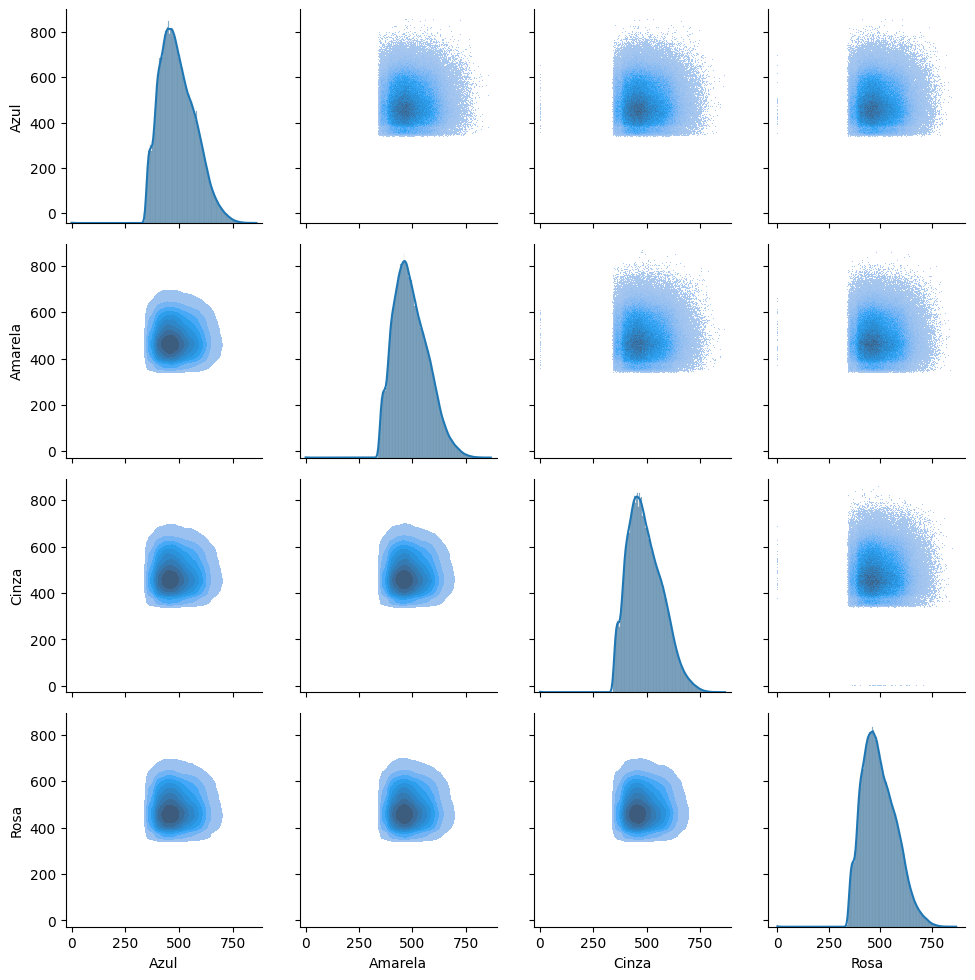

In [66]:
import seaborn as sns

g = sns.PairGrid(prova_cn)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)